In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%pylab inline
import xarray as xr
from tqdm.autonotebook import tqdm
import torch
import pytorch_lightning as pl
from pytorch_lightning.callbacks import Callback

# Set a bigger default plot size
mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['font.size'] = 16

from hydrogen_pg.dataloaders.conv3d_space_dataloader import Conv3dDataset
from hydrogen_pg.dataloaders.conv3d_space_dataloader import Conv3dDataModule
from hydrogen_pg.models.conv3d_autoencoder import Conv3d_AE 
from hydrogen_pg.utils.callbacks import MetricsCallback

Populating the interactive namespace from numpy and matplotlib


/tmp/ipykernel_2567295/617916899.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
#pfmeta_file = '/hydrodata/PFCLM/Taylor/Simulations/1990/Taylor_1990.out.pfmetadata'
pfmeta_file = '/home/ab6361/small_CONUS1_2003_fake.out.pfmetadata'
in_vars = ['pressure']
out_vars = ['pressure']
patch_sizes = {'x': 50, 'y': 50}
datamodule = Conv3dDataModule(pfmeta_file, 
                              in_vars=in_vars, 
                              out_vars=out_vars,
                              patch_sizes=patch_sizes,
                              max_patches=10,
                              train_size=200,
                              val_size=40,
                             )

data_shape  = datamodule.shape
data_in_features, data_out_features = datamodule.feature_names

Error Reading Subgrid Header: Invalid argument


In [3]:
model = Conv3d_AE(grid_size=data_shape, embedding_dim=512, in_vars=in_vars, out_vars=out_vars)
model.configure_optimizers()
model.configure_loss()

model_shape = model.shape
model_in_features, model_out_features = model.feature_names

In [4]:
assert data_shape == model_shape
assert data_in_features == model_in_features
assert data_out_features == model_out_features

In [5]:
metrics = MetricsCallback()
trainer = pl.Trainer(
              max_epochs=200, 
              gpus=1, 
              callbacks=[metrics]
          )
trainer.fit(model, datamodule)

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
Error Reading Subgrid Header: Invalid argument
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type       | Params
---------------------------------------
0 | encoder | Sequential | 1.9 M 
1 | decoder | Sequential | 1.9 M 
2 | model   | Sequential | 3.7 M 
---------------------------------------
3.7 M     Trainable params
0         Non-trainable params
3.7 M     Total params
14.916    Total estimated model params size (MB)


Validation sanity check: 0it [00:00, ?it/s]

/home/ab6361/software/miniconda/envs/all/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:105: UserWarning: The dataloader, val dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 96 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/home/ab6361/software/miniconda/envs/all/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:105: UserWarning: The dataloader, train dataloader, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 96 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(
/home/ab6361/software/miniconda/envs/all/lib/python3.9/site-packages/pytorch_lightning/trainer/data_loading.py:326: UserWarning: The number of training samples (1) is smaller than the logging interval Tra

Training: -1it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Validating: 0it [00:00, ?it/s]

Text(0, 0.5, 'MSE Loss')

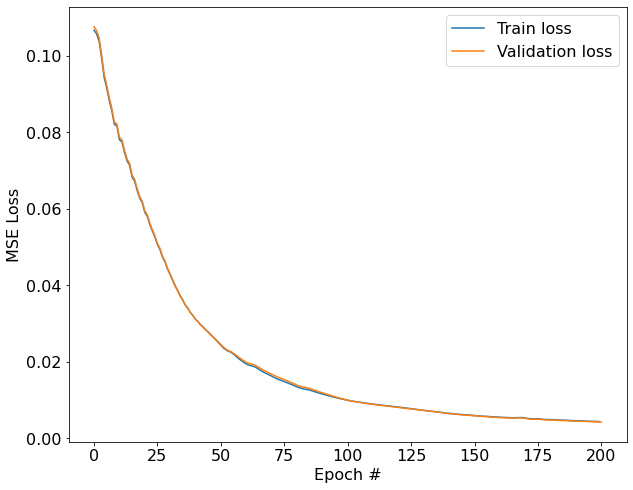

In [6]:
plt.plot(metrics.metrics['train_loss'], label='Train loss')
plt.plot(metrics.metrics['val_loss'], label='Validation loss')
plt.legend()
plt.xlabel('Epoch #')
plt.ylabel('MSE Loss')
#plt.ylim([0.00, 0.02])

In [7]:
val_x, val_y = next(iter(datamodule.val_dataloader()))
val_x = val_x[0:1]
val_y = val_y[0:1].squeeze().cpu().detach().numpy()

val_yhat = model.model(val_x)
val_yhat = val_yhat.squeeze().cpu().detach().numpy()
err = val_y - val_yhat

Text(0.5, 1.0, 'Error')

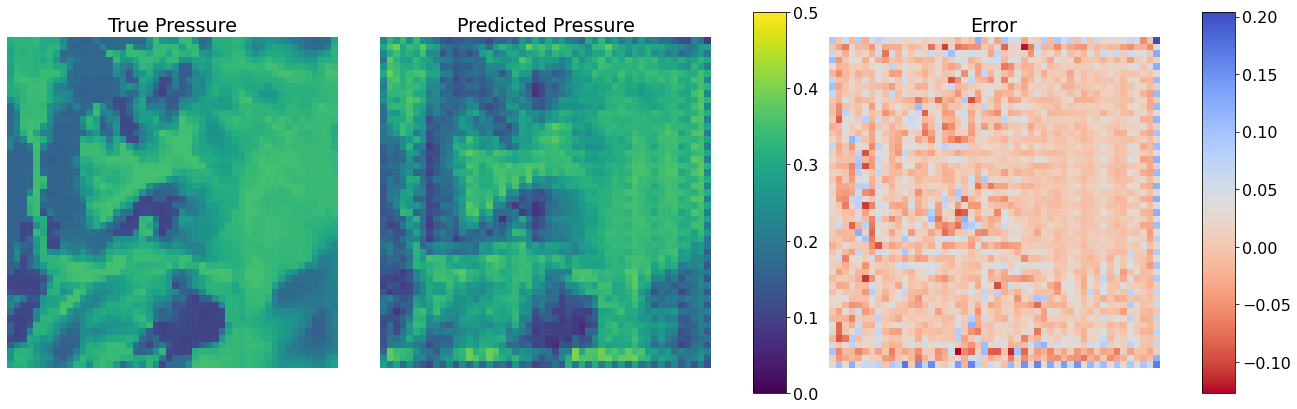

In [14]:
tot_val_y = np.mean(val_y, axis=0)
tot_val_yhat = np.mean(val_yhat, axis=0)
tot_err_yhat = np.mean(err, axis=0)

fig, axes = plt.subplots(1, 5, figsize=(22, 7),
                         gridspec_kw={'width_ratios': [1, 1, 0.1, 1, 0.1], 
                                      'height_ratios': [1]})

sm = axes[0].imshow(tot_val_y, vmin=0, vmax=0.5)
axes[1].imshow(tot_val_yhat, vmin=0, vmax=0.5)
plt.colorbar(sm, cax=axes[2])
sm = axes[3].imshow(tot_err_yhat, cmap='coolwarm_r')#, vmin=1, vmax=1.5)
plt.colorbar(sm, cax=axes[-1])

for ax in axes[[0,1,3]]:
    ax.axis('off')
axes[0].set_title('True Pressure')
axes[1].set_title('Predicted Pressure')
axes[3].set_title('Error')

# Testing shapes...

In [15]:
ae = Conv3d_AE(grid_size=[5,50,50], in_vars=['saturation'], out_vars=['saturation'])
x = torch.randn(1, 1, 5, 50, 50)

print('Encoder shapes:')
print('---------------------------------------------------------------------------------')
for l in ae.encoder:
    x = l(x)
    print(type(l), x.shape)
    
    
print('Decoder shapes:')
print('---------------------------------------------------------------------------------')
for l in ae.decoder:
    x = l(x)
    print(type(l), x.shape)

Encoder shapes:
---------------------------------------------------------------------------------
<class 'torch.nn.modules.conv.Conv3d'> torch.Size([1, 1, 5, 50, 50])
<class 'torch.nn.modules.activation.Mish'> torch.Size([1, 1, 5, 50, 50])
<class 'torch.nn.modules.conv.Conv3d'> torch.Size([1, 1, 5, 25, 25])
<class 'torch.nn.modules.activation.Mish'> torch.Size([1, 1, 5, 25, 25])
<class 'torch.nn.modules.flatten.Flatten'> torch.Size([1, 3125])
<class 'torch.nn.modules.linear.Linear'> torch.Size([1, 4096])
<class 'torch.nn.modules.linear.Linear'> torch.Size([1, 4096])
Decoder shapes:
---------------------------------------------------------------------------------
<class 'torch.nn.modules.linear.Linear'> torch.Size([1, 4096])
<class 'torch.nn.modules.linear.Linear'> torch.Size([1, 3125])
<class 'hydrogen_pg.models.conv3d_autoencoder.Reshape'> torch.Size([1, 1, 5, 25, 25])
<class 'torch.nn.modules.conv.ConvTranspose3d'> torch.Size([1, 1, 5, 25, 25])
<class 'torch.nn.modules.activation.Mis

In [ ]:
x = torch.randn(1, 1, 5, 50, 50)
print(x.shape)
y = ae.encoder(x)
print(y.shape)
x_hat = ae.decoder(y)
print(x_hat.shape)